# ML ASS-11


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


1. You are given a data set on stroke detection dataset. You’ve built a
classification model and achieved an accuracy of 97% accuracy. Will
you check their recall and precision or other tests also?


Yes we have to check Recall and f1 score

2. How to deal with unbalanced binary classification?

#### 1. Use the right evaluation metrics

Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous. Imagine our training data is the one illustrated in graph above. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99.8%), but obviously, this model won’t provide any valuable information for us.


In this case, other alternative evaluation metrics can be applied such as:


Precision/Specificity: how many selected instances are relevant.

Recall/Sensitivity: how many relevant instances are selected.

F1 score: harmonic mean of precision and recall.

MCC: correlation coefficient between the observed and predicted binary classifications.

AUC: relation between true-positive rate and false positive rate.

#### 2. Resample the training set

Apart from using different evaluation criteria, one can also work on getting different dataset. Two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.

Under-sampling
 

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

Over-sampling
 

On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique)

Note that there is no absolute advantage of one resampling method over another. Application of these two methods depends on the use case it applies to and the dataset itself. A combination of over- and under-sampling is often successful as well

Use K-fold Cross-Validation in the Right Way

It is noteworthy that cross-validation should be applied properly while using over-sampling method to address imbalance problems.

Keep in mind that over-sampling takes observed rare samples and applies bootstrapping to generate new random data based on a distribution function. If cross-validation is applied after over-sampling, basically what we are doing is overfitting our model to a specific artificial bootstrapping result. That is why cross-validation should always be done before over-sampling the data, just as how feature selection should be implemented. Only by resampling the data repeatedly, randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.

What is a bias-variance trade-off?

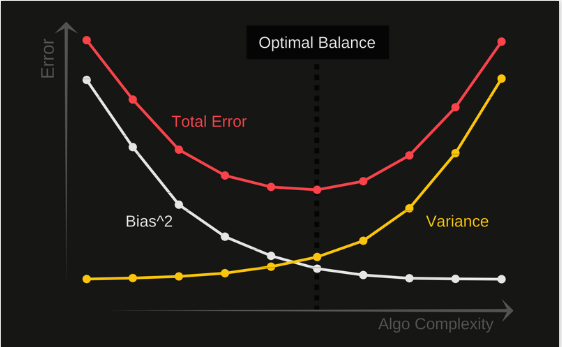

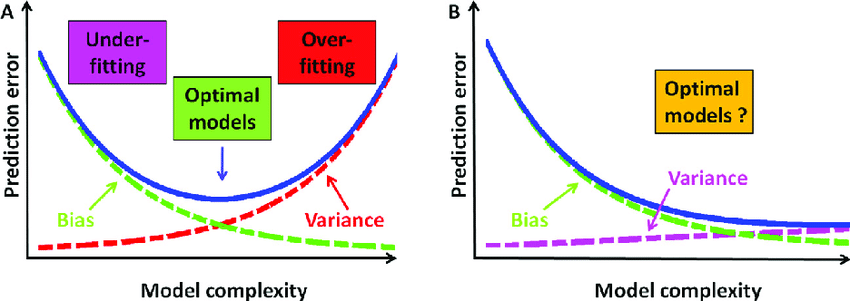

When the model complexcity increases varience is also increase and bias is decrease but we can't get zero bias and zero vairience we we take low bias then varience is high(Overfit) if we take low varience then bias is increase (Underfit) we can see from graph both are inversly proportional that's why for avoid overfitting and underfitting we have to select optimum value of both bias and varience  

4 What is underfitting ?


when model is highly bias and low varience means , we make lot assumptions regarding model like in linear regression we make assumption dependent and independent feature are linerly related but in actual that is not a case every assumption in linear regression are hypothetical that's why it is a high bias low varience means if we change our training data model able to capture every point as it is like previous training model 

5. What is overfitting ?


when model is low bias and high varience 

ex - decession tree


6 How do we calculate entropy in a decision tree?


 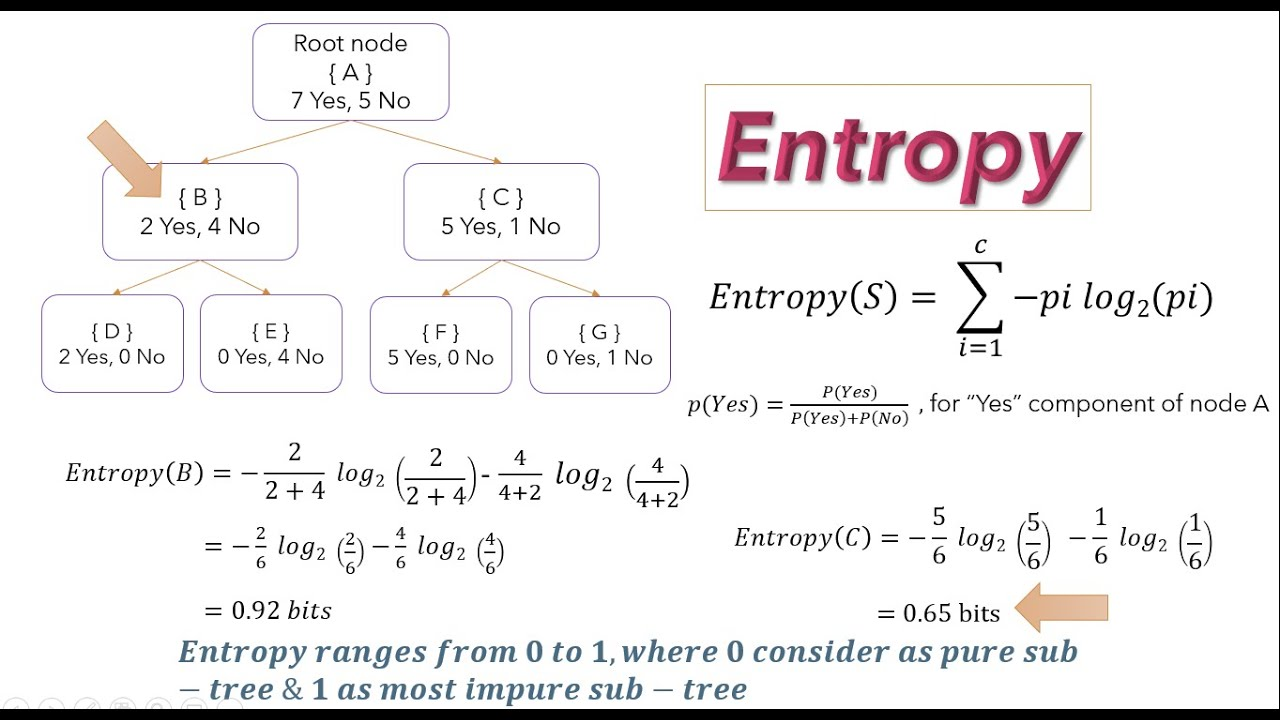

7. Train the logistic regression model on the below given dataset (# hints - there are two
sheets and Target is Covid_yes_no).

 
8. Print the confusion matrix of the above trained model.

9. Print the TP and TN for the above trained dataset.

In [4]:
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Covid Data.xlsx - Surveyor-1 (1).csv")

In [5]:
df.head()

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche
0,shivani,24/3/2020,Cough,Headache,Fever,Iran,4,2
1,isha,25/3/2020,Cough,Headache,Fever,Mauritius,7,4
2,smt shyani devi,26/3/2020,Cough,Headache,Fever,Mozambique,6,4
3,divya,27/3/2020,Cough,Headache,Fever,Cameroon,5,2
4,mansi,28/3/2020,Cough,Headache,Fever,South Sudan,6,3


In [6]:
df1 = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Covid Data.xlsx - Surveyor-2.csv")

In [7]:
df1 = df1.transpose()

In [8]:
df1 = df1.reset_index()
header_row = df1.iloc[0]
df2 = pd.DataFrame(df1.values[1:], columns=header_row)

In [9]:
df.head()

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche
0,shivani,24/3/2020,Cough,Headache,Fever,Iran,4,2
1,isha,25/3/2020,Cough,Headache,Fever,Mauritius,7,4
2,smt shyani devi,26/3/2020,Cough,Headache,Fever,Mozambique,6,4
3,divya,27/3/2020,Cough,Headache,Fever,Cameroon,5,2
4,mansi,28/3/2020,Cough,Headache,Fever,South Sudan,6,3


In [10]:
df.rename(columns = {"Name ":"Name"},inplace = True)

In [11]:
df.head()

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche
0,shivani,24/3/2020,Cough,Headache,Fever,Iran,4,2
1,isha,25/3/2020,Cough,Headache,Fever,Mauritius,7,4
2,smt shyani devi,26/3/2020,Cough,Headache,Fever,Mozambique,6,4
3,divya,27/3/2020,Cough,Headache,Fever,Cameroon,5,2
4,mansi,28/3/2020,Cough,Headache,Fever,South Sudan,6,3


In [12]:
df2.head()

,Name,Age,Address,Country Visit,Phone number,Covid_yes_No
0,shivani,45,A Narayanapuram Anantapur Ananthapur Andhra Pr...,Iran,93050261532,1
1,isha,69,Akuledu Anantapur Ananthapur Andhra Pradesh515731,Mauritius,97956337856,0
2,smt shyani devi,72,Alamuru Anantapur Ananthapur Andhra Pradesh515002,Mozambique,79197285931,0
3,divya,56,Allapuram Anantapur Ananthapur Andhra Pradesh5...,Cameroon,79722761857,0
4,mansi,73,Aluru Anantapur Ananthapur Andhra Pradesh515415,South Sudan,82256401945,1


In [13]:
df = pd.merge(df , df2 , on = "Name")

In [14]:
df.head()

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche,Age,Address,Country Visit,Phone number,Covid_yes_No
0,shivani,24/3/2020,Cough,Headache,Fever,Iran,4,2,45,A Narayanapuram Anantapur Ananthapur Andhra Pr...,Iran,93050261532,1
1,shivani,17/7/2020,Headache,Fever,Cough,Northern Mariana Islands,8,4,45,A Narayanapuram Anantapur Ananthapur Andhra Pr...,Iran,93050261532,1
2,isha,25/3/2020,Cough,Headache,Fever,Mauritius,7,4,69,Akuledu Anantapur Ananthapur Andhra Pradesh515731,Mauritius,97956337856,0
3,isha,22/4/2020,Cough,Headache,Fever,Guadeloupe,7,5,69,Akuledu Anantapur Ananthapur Andhra Pradesh515731,Mauritius,97956337856,0
4,smt shyani devi,26/3/2020,Cough,Headache,Fever,Mozambique,6,4,72,Alamuru Anantapur Ananthapur Andhra Pradesh515002,Mozambique,79197285931,0


In [15]:
df = df.drop(["Name","Address"] , axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Test Date      541 non-null    object
 1   Symptoms_1     539 non-null    object
 2   Symptoms_2     539 non-null    object
 3   Symptoms_3     541 non-null    object
 4   Country Name   541 non-null    object
 5   Fever since    541 non-null    int64 
 6   Headche        541 non-null    int64 
 7   Age            541 non-null    object
 8   Country Visit  541 non-null    object
 9   Phone number   541 non-null    object
 10  Covid_yes_No   541 non-null    object
dtypes: int64(2), object(9)
memory usage: 50.7+ KB


In [18]:
df.isnull().sum()

Test Date        0
Symptoms_1       2
Symptoms_2       2
Symptoms_3       0
Country Name     0
Fever since      0
Headche          0
Age              0
Country Visit    0
Phone number     0
Covid_yes_No     0
dtype: int64

In [41]:
df = df.drop("Phone number" , axis = 1)

In [19]:
df["Symptoms_1"] = df["Symptoms_1"].fillna(df["Symptoms_1"].mode()[0])
df["Symptoms_2"] = df["Symptoms_2"].fillna(df["Symptoms_2"].mode()[0])

In [20]:
df = df.drop("Test Date" , axis = 1)

In [21]:
df.head()

,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche,Age,Country Visit,Phone number,Covid_yes_No
0,Cough,Headache,Fever,Iran,4,2,45,Iran,93050261532,1
1,Headache,Fever,Cough,Northern Mariana Islands,8,4,45,Iran,93050261532,1
2,Cough,Headache,Fever,Mauritius,7,4,69,Mauritius,97956337856,0
3,Cough,Headache,Fever,Guadeloupe,7,5,69,Mauritius,97956337856,0
4,Cough,Headache,Fever,Mozambique,6,4,72,Mozambique,79197285931,0


In [22]:
df.dtypes

Symptoms_1       object
Symptoms_2       object
Symptoms_3       object
Country Name     object
Fever since       int64
Headche           int64
Age              object
Country Visit    object
Phone number     object
Covid_yes_No     object
dtype: object

In [23]:
for i in df.columns:
    print(df[i].value_counts())

Headache    379
Cough       162
Name: Symptoms_1, dtype: int64
Fever       379
Headache    162
Name: Symptoms_2, dtype: int64
Cough    379
Fever    162
Name: Symptoms_3, dtype: int64
Anguilla      6
Somalia       6
Niger         6
Bulgaria      6
Kiribati      6
             ..
Mali          5
Austria       5
Mozambique    1
Mauritius     1
Iran          1
Name: Country Name, Length: 99, dtype: int64
8    120
7    108
4    106
6    104
5    103
Name: Fever since , dtype: int64
3    151
2    138
5    129
4    123
Name: Headche , dtype: int64
65    36
57    36
69    29
61    27
71    26
51    26
60    25
70    23
56    20
48    19
63    18
74    17
47    16
53    16
54    16
59    15
75    15
72    15
45    15
67    14
52    14
68    12
55    12
46    12
58    11
64    11
73    11
66    10
62     9
50     8
49     7
Name: Age, dtype: int64
Yemen               25
Colombia            14
El Salvador         13
Saudi Arabia        12
Falkland Islands    12
                    ..
Maldives    

In [24]:
df["Covid_yes_No"] = df["Covid_yes_No"].astype("int64")

In [25]:
df["Age"] = df["Age"].astype("int64")

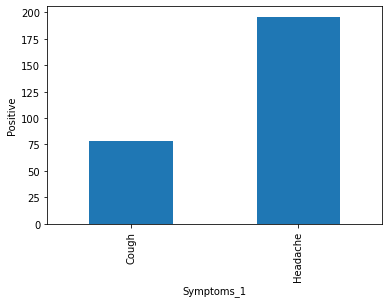

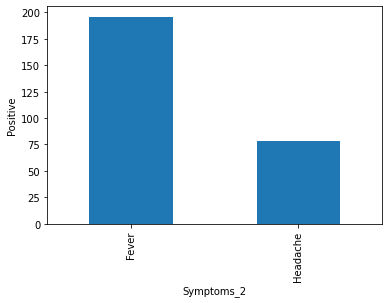

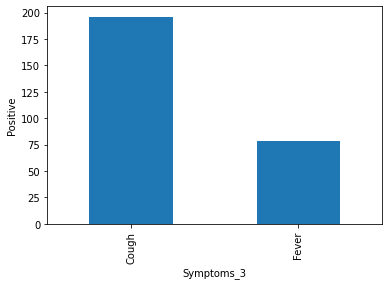

In [26]:
columns = ["Symptoms_1" , "Symptoms_2","Symptoms_3"]
for i in columns:
    plt.figure()
    df.groupby([i])["Covid_yes_No"].sum().plot.bar()
    plt.ylabel("Positive")

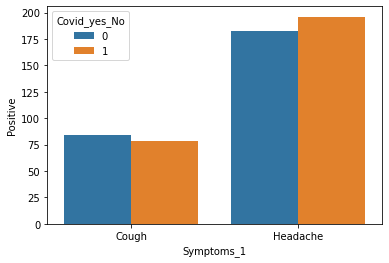

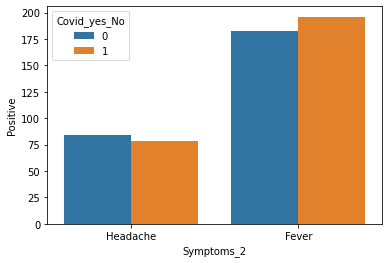

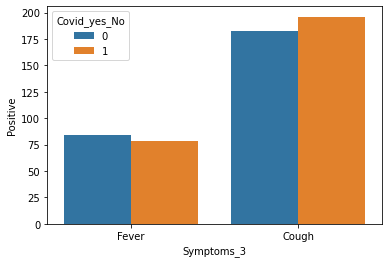

In [27]:
columns = ["Symptoms_1" , "Symptoms_2","Symptoms_3"]
for i in columns:
    plt.figure()
    sns.countplot(x = df[i] , hue = df["Covid_yes_No"])
    plt.ylabel("Positive")

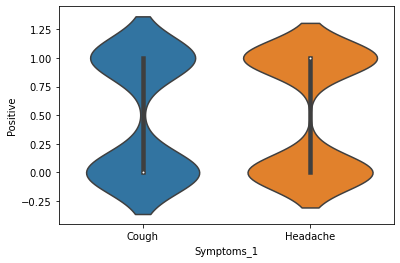

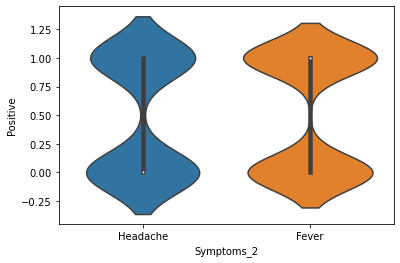

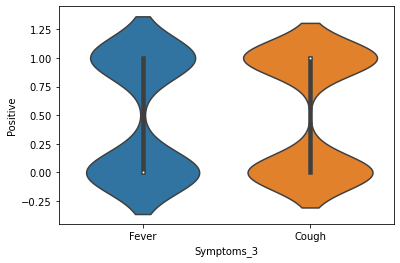

In [28]:
columns = ["Symptoms_1" , "Symptoms_2","Symptoms_3"]
for i in columns:
    plt.figure()
    sns.violinplot(x = df[i] , y = df["Covid_yes_No"])
    plt.ylabel("Positive")

In [29]:
df.groupby(["Country Name" ,"Covid_yes_No" ])["Symptoms_3"].count().reset_index()

,Country Name,Covid_yes_No,Symptoms_3
0,Afghanistan,0,2
1,Afghanistan,1,4
2,Aland Islands,0,3
3,Aland Islands,1,3
4,Algeria,0,3
...,...,...,...
186,Western Sahara,1,3
187,Yemen,0,2
188,Yemen,1,4
189,Zimbabwe,0,2


In [30]:
df = df.drop(["Country Name" , "Country Visit"] , axis=1)

<AxesSubplot:xlabel='Fever since ', ylabel='Covid_yes_No'>

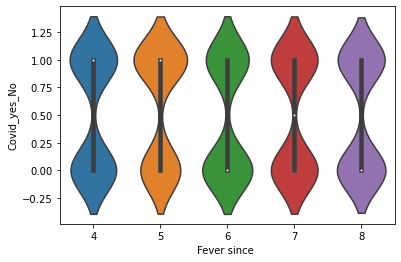

In [31]:
sns.violinplot(x = df["Fever since "] , y= df["Covid_yes_No"] )

<AxesSubplot:xlabel='Fever since ', ylabel='count'>

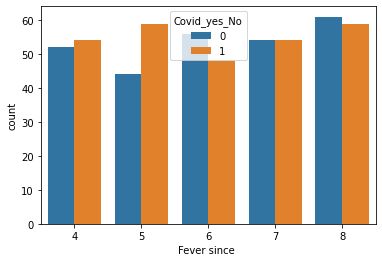

In [32]:
sns.countplot(x = df["Fever since "] ,hue = df["Covid_yes_No"] )

<AxesSubplot:xlabel='Headche ', ylabel='count'>

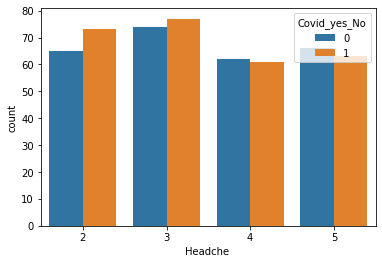

In [33]:
sns.countplot(x = df["Headche "] ,hue = df["Covid_yes_No"] )

<AxesSubplot:xlabel='Headche ', ylabel='Covid_yes_No'>

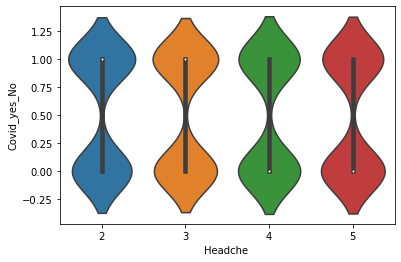

In [34]:
 sns.violinplot(x = df["Headche "] , y= df["Covid_yes_No"] )

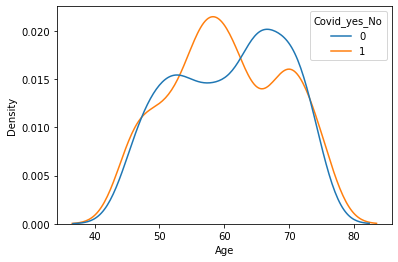

In [35]:
sns.kdeplot(df["Age"] , hue = df["Covid_yes_No"])
plt.show()

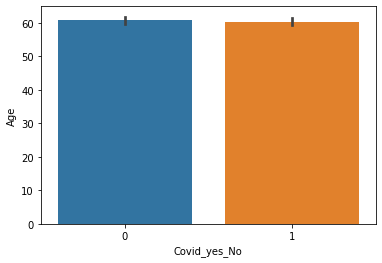

In [36]:
sns.barplot(x = df["Covid_yes_No"] , y = df["Age"])
plt.show()

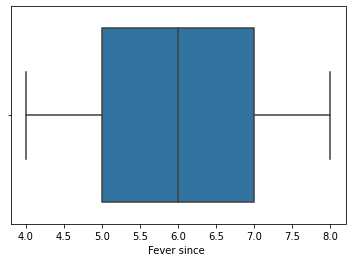

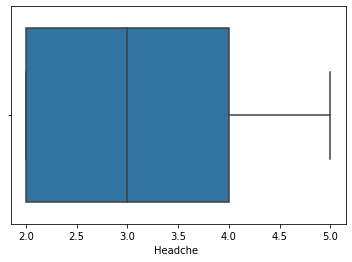

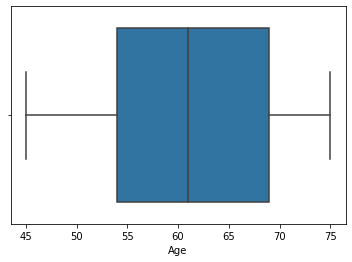

In [37]:
for i in ["Fever since " , "Headche " , "Age"]:
    plt.figure()
    sns.boxplot(x = df[i])

In [38]:
for i in ["Symptoms_1","Symptoms_2","Symptoms_3"]:
    df = pd.get_dummies(data = df , columns=[i],drop_first=True)

In [42]:
df.head()

,Fever since,Headche,Age,Covid_yes_No,Symptoms_1_Headache,Symptoms_2_Headache,Symptoms_3_Fever
0,4,2,45,1,0,1,1
1,8,4,45,1,1,0,0
2,7,4,69,0,0,1,1
3,7,5,69,0,0,1,1
4,6,4,72,0,0,1,1


In [43]:
y = df.iloc[:,3].values

In [44]:
y

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [45]:
X = df.drop("Covid_yes_No" , axis = 1).values
Y = df[["Covid_yes_No"]].values

Model Training

In [46]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression()
lg.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
Y_pred = lg.predict(X_test)


In [50]:
from sklearn import metrics 
metrics.confusion_matrix(Y_test , Y_pred)

array([[23, 30],
       [27, 29]], dtype=int64)

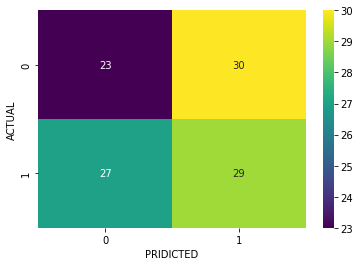

In [51]:
sns.heatmap(metrics.confusion_matrix(Y_test , Y_pred),annot = True , cmap="viridis")
plt.xlabel("PRIDICTED")
plt.ylabel("ACTUAL")
plt.show()

Print the TP and TN for the above trained dataset.

In [53]:
tn,fp,fn,tp = metrics.confusion_matrix(Y_test , Y_pred).ravel()
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)

tn 23
fp 30
fn 27
tp 29


In [54]:
# classification report
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.46      0.43      0.45        53
           1       0.49      0.52      0.50        56

    accuracy                           0.48       109
   macro avg       0.48      0.48      0.48       109
weighted avg       0.48      0.48      0.48       109



In [55]:
metrics.accuracy_score(Y_test,Y_pred)

0.47706422018348627

In [58]:
df["Covid_yes_No"].value_counts()

1    274
0    267
Name: Covid_yes_No, dtype: int64

In [59]:
Y_pred_proba = lg.predict_proba(X_test)[:,1]

In [60]:
# fpr,tpr
fpr, tpr, threshold = metrics.roc_curve(Y_test,Y_pred_proba)

In [61]:
# auc_score
metrics.roc_auc_score(Y_test,Y_pred_proba)

0.47607816711590295

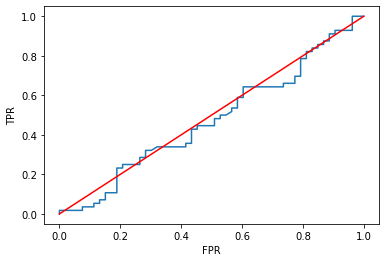

In [63]:
# roc curve
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr,fpr,color = "red")
plt.show()